In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio

from sklearn.decomposition import PCA as sk_pca

In [20]:
data = sio.loadmat('data/ex7faces.mat')
X = np.array([x.reshape((32, 32)).T.reshape(1024) for x in data.get('X')]) #transport each x
# X.shape(5000, 1024) (m, n)
X

array([[ -37.86631387,  -25.86631387,  -16.86631387, ...,   75.13368613,
          31.13368613,  -99.86631387],
       [   8.13368613,   17.13368613,   19.13368613, ...,  -34.86631387,
          12.13368613,    0.13368613],
       [ -32.86631387,   -6.86631387,   15.13368613, ...,  -48.86631387,
        -100.86631387, -111.86631387],
       ...,
       [ -46.86631387,  -46.86631387,  -28.86631387, ...,  106.13368613,
         105.13368613,   59.13368613],
       [  19.13368613,   19.13368613,   -2.86631387, ...,  -60.86631387,
         -60.86631387,  -46.86631387],
       [-108.86631387, -103.86631387,  -93.86631387, ...,    4.13368613,
          11.13368613,   18.13368613]])

In [15]:
def standard(x):

    x = (x - np.mean(x)) / np.std(x)

    return x

In [16]:
def plot_n_image(X, n):
    """ plot first n images
    n has to be a square number
    """
    pic_size = int(np.sqrt(X.shape[1]))
    grid_size = int(np.sqrt(n))

    first_n_images = X[:n, :]

    fig, ax_array = plt.subplots(nrows=grid_size, ncols=grid_size,
                                    sharey=True, sharex=True, figsize=(8, 8))

    for r in range(grid_size):
        for c in range(grid_size):
            ax_array[r, c].imshow(first_n_images[grid_size * r + c].reshape((pic_size, pic_size)))
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))

In [21]:
def covarianceMatrix(X):

    X = standard(X) #(m, n)
    m = X.shape[0]
    n = X.shape[1]

    sigma = (X.T @ X) / m

    return sigma #array


In [26]:
def singularValue(sigma):

    U, S, V = np.linalg.svd(sigma)

    return U, S, V #arrar

In [33]:
sigma = covarianceMatrix(X)
U, _, _ = singularValue(sigma)
U.shape

(1024, 1024)

In [38]:
def project(X, U, k):
    
    U_reduce = U[:, :k] # (n, k)

    z = X @ U_reduce

    return z #(m, k)


In [45]:
z = project(X, U, 1)
z

array([[ 526.09608833],
       [ 304.5906028 ],
       [-389.99893833],
       ...,
       [ 487.55926046],
       [1358.99575656],
       [ 372.01599145]])

In [48]:
def reconstruction(z, U, k):

    U_reduce = U[:, :k] # (n, k)

    X_recovered = z @ U_reduce.T

    return X_recovered

In [49]:
reconstruction(z, U, 1)

array([[ -8.6331713 , -10.6160095 , -12.68439698, ...,  -6.48465174,
         -4.76131319,  -3.0329432 ],
       [ -4.99829386,  -6.14628545,  -7.34380697, ...,  -3.75437877,
         -2.75662809,  -1.75596439],
       [  6.39983401,   7.8697267 ,   9.40303771, ...,   4.80712051,
          3.52959684,   2.24834333],
       ...,
       [ -8.00078675,  -9.83838096, -11.75525792, ...,  -6.00964743,
         -4.41254438,  -2.81077844],
       [-22.30095114, -27.42295975, -32.76595674, ..., -16.75095937,
        -12.29928252,  -7.83460861],
       [ -6.10473609,  -7.50685167,  -8.96946133, ...,  -4.585463  ,
         -3.36684626,  -2.14467166]])

In [50]:
def PCA(X, k):

    X = standard(X)
    sigma = covarianceMatrix(X)
    U, _, _ = singularValue(sigma)
    z = project(X, U, k)

    return z

In [53]:
def recover_data(z, U):
    m, n = z.shape

    return z @ U[:, :n].T

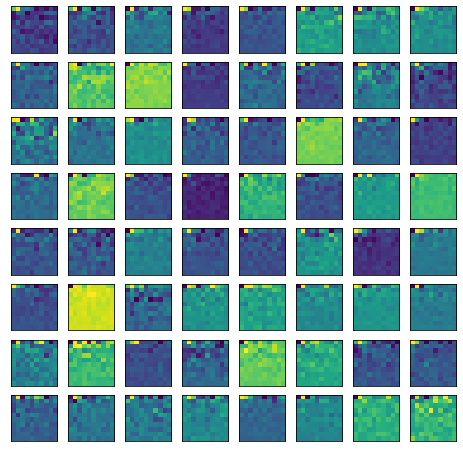

In [54]:
z = PCA(X, k=100)
plot_n_image(z, n=64)
plt.show()

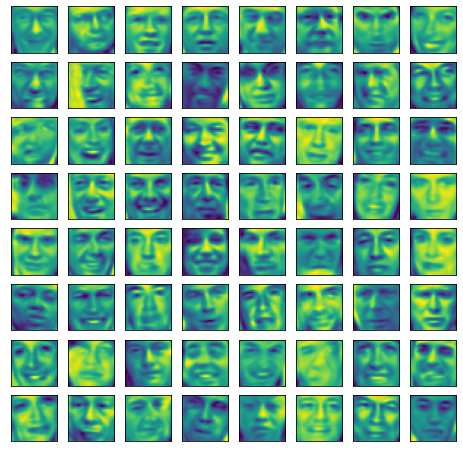

In [55]:
X_recovered = recover_data(z, U)
plot_n_image(X_recovered, 64)
plt.show()

In [58]:
from sklearn.decomposition import PCA

sk_pca = PCA(n_components=100)
Z = sk_pca.fit_transform(X)
Z.shape

(5000, 100)

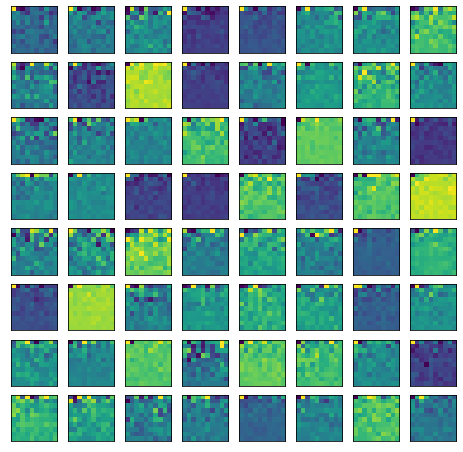

In [59]:
plot_n_image(Z, 64)
plt.show()

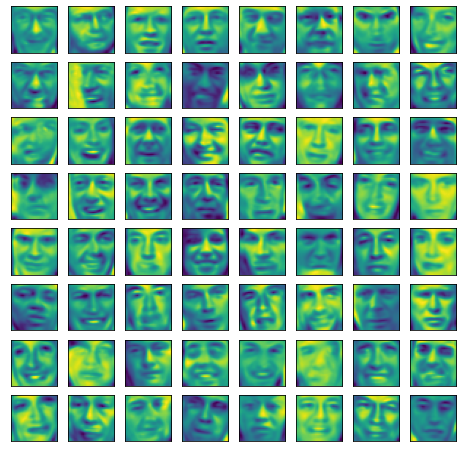

In [60]:
X_recovered = sk_pca.inverse_transform(Z)
plot_n_image(X_recovered, 64)
plt.show()